In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!conda install pytorch torchvision cudatoolkit=11.3 -c pytorch

/bin/bash: conda: command not found


In [3]:
!git clone https://github.com/ultralytics/yolov5  
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15672, done.
remote: Total 15672 (delta 0), reused 0 (delta 0), pack-reused 15672
Receiving objects: 100% (15672/15672), 14.44 MiB | 16.35 MiB/s, done.
Resolving deltas: 100% (10741/10741), done.
/content/yolov5


In [4]:
%pip install -qr requirements.txt  

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.1/585.1 kB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 23.4 MB/s eta 0:00:00


In [5]:
%cd yolov5
import torch
from yolov5 import utils
import torch
import utils
from IPython import display
from IPython.display import clear_output
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob


%matplotlib inline
display = utils.notebook_init()

YOLOv5 🚀 v7.0-167-g5deff14 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.5/78.2 GB disk)


In [7]:
!python train.py --batch 32 --epochs 150 --data '/content/drive/MyDrive/burgers_data/burgers_data.yaml' --weights 'yolov5s6.pt' --project 'runs_burger' --name 'feature_extraction' --cache --freeze 12


train: weights=yolov5s6.pt, cfg=, data=/content/drive/MyDrive/burgers_data/burgers_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs_burger, name=feature_extraction, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-167-g5deff14 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anc

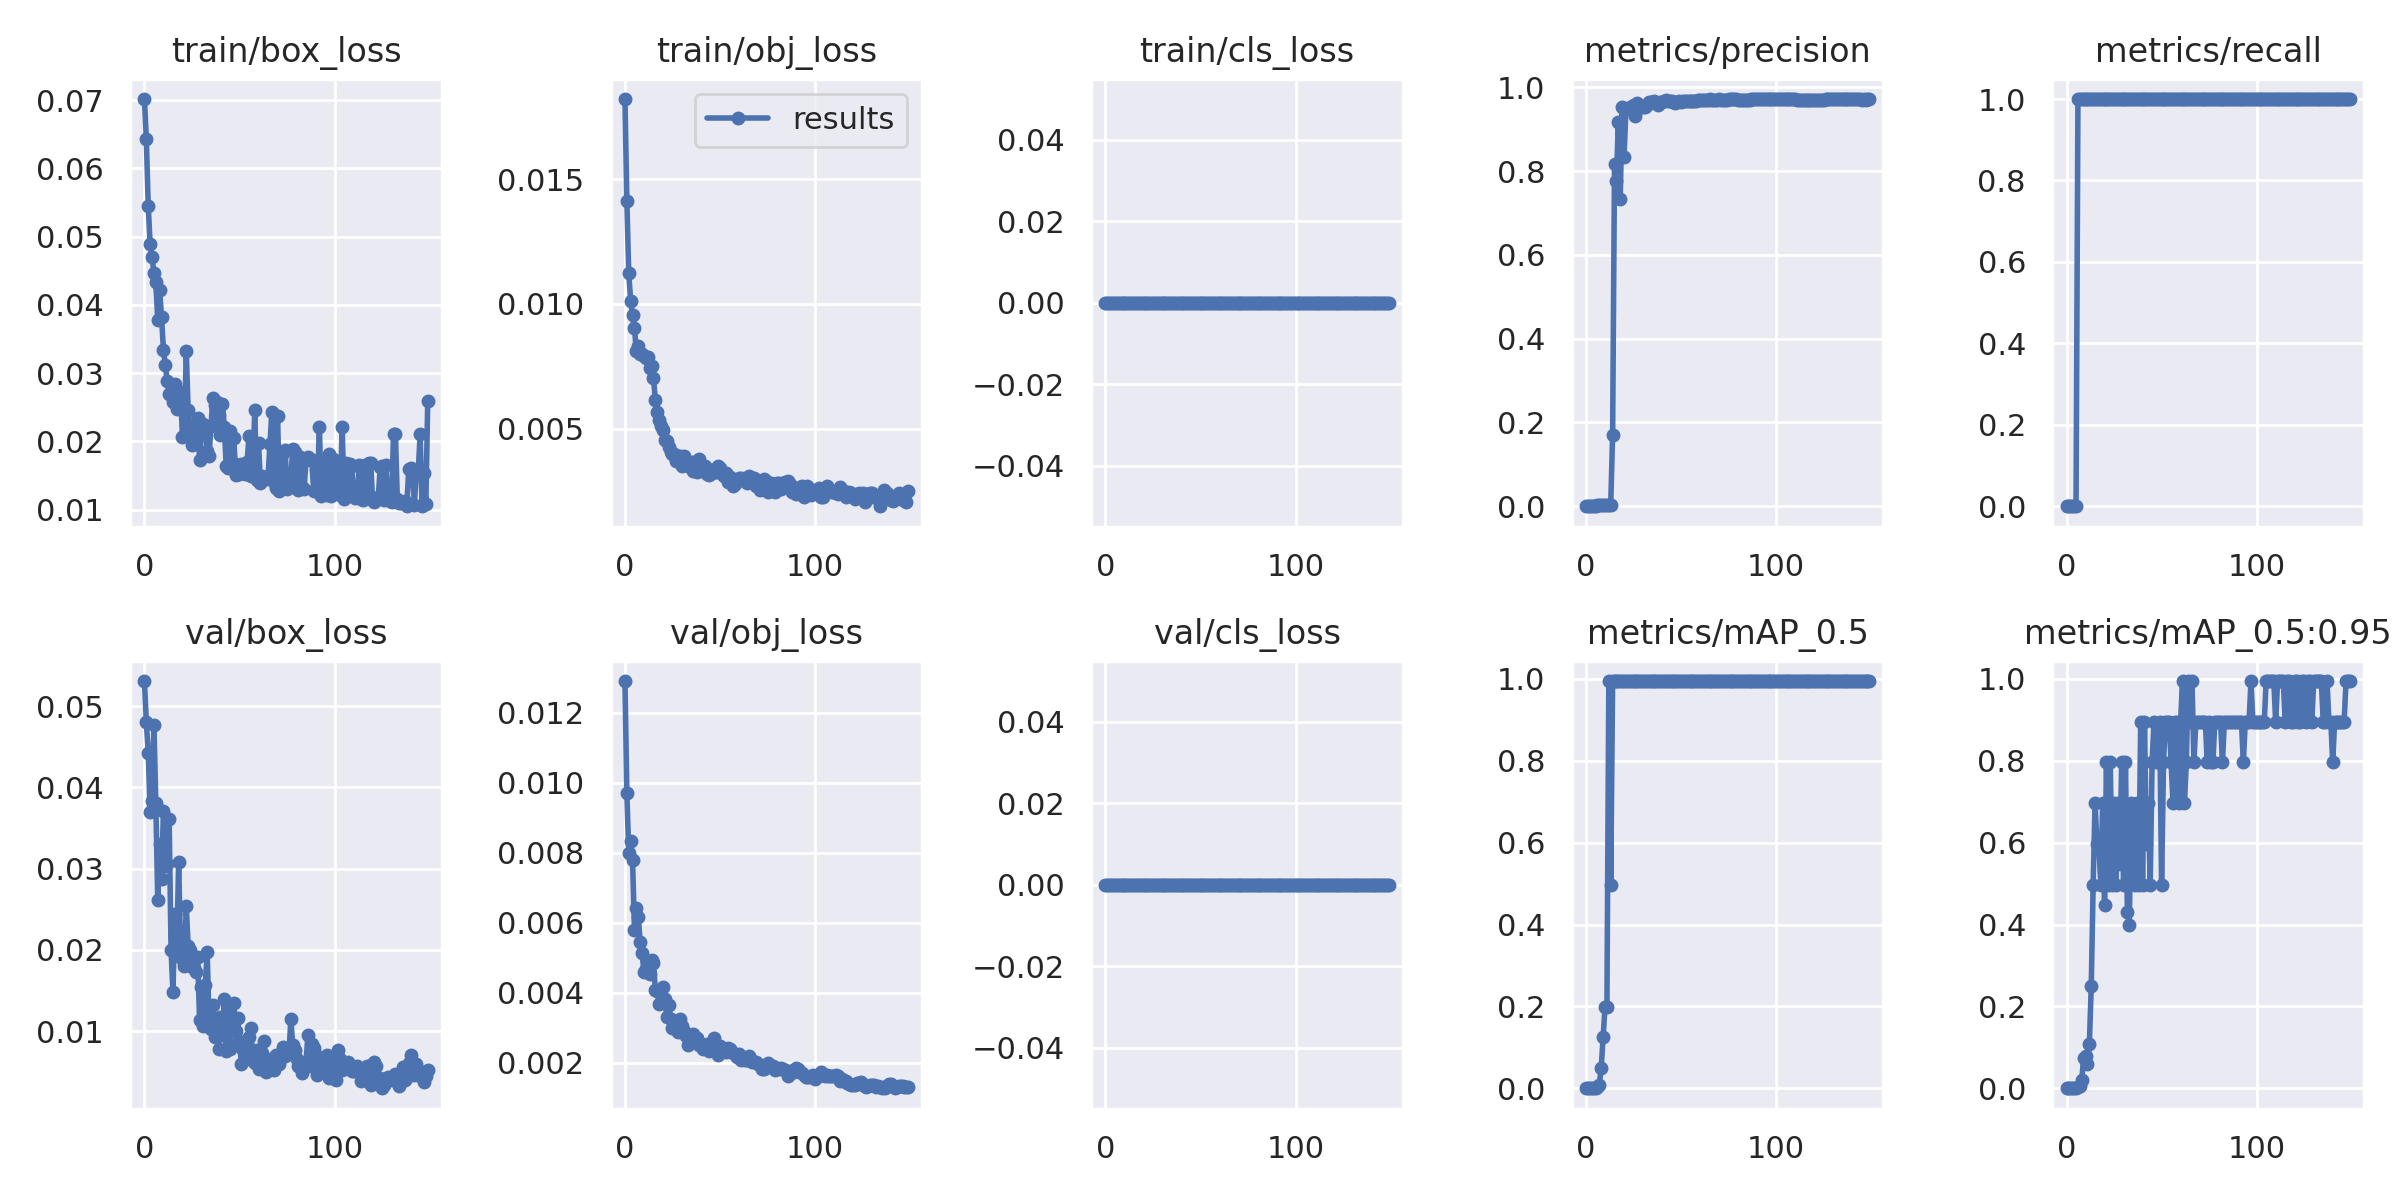

In [8]:
display.Image(f"/content/yolov5/runs_burger/feature_extraction2/results.png")

In [9]:
!python train.py --hyp '/content/yolov5/data/hyps/hyp.VOC.yaml' --batch 16 --epochs 100 --data '/content/drive/MyDrive/burgers_data/burgers_data.yaml' --weights '/content/yolov5/runs_burger/feature_extraction2/weights/best.pt' --project 'runs_burgers' --name 'fine-tuning' --cache


train: weights=/content/yolov5/runs_burger/feature_extraction2/weights/best.pt, cfg=, data=/content/drive/MyDrive/burgers_data/burgers_data.yaml, hyp=/content/yolov5/data/hyps/hyp.VOC.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs_burgers, name=fine-tuning, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-167-g5deff14 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.00334, lrf=0.15135, momentum=0.74832, weight_decay=0.00025, warmup_epochs=3.3835, warmup_momentum=0.59462, warmup_bias_lr=0.

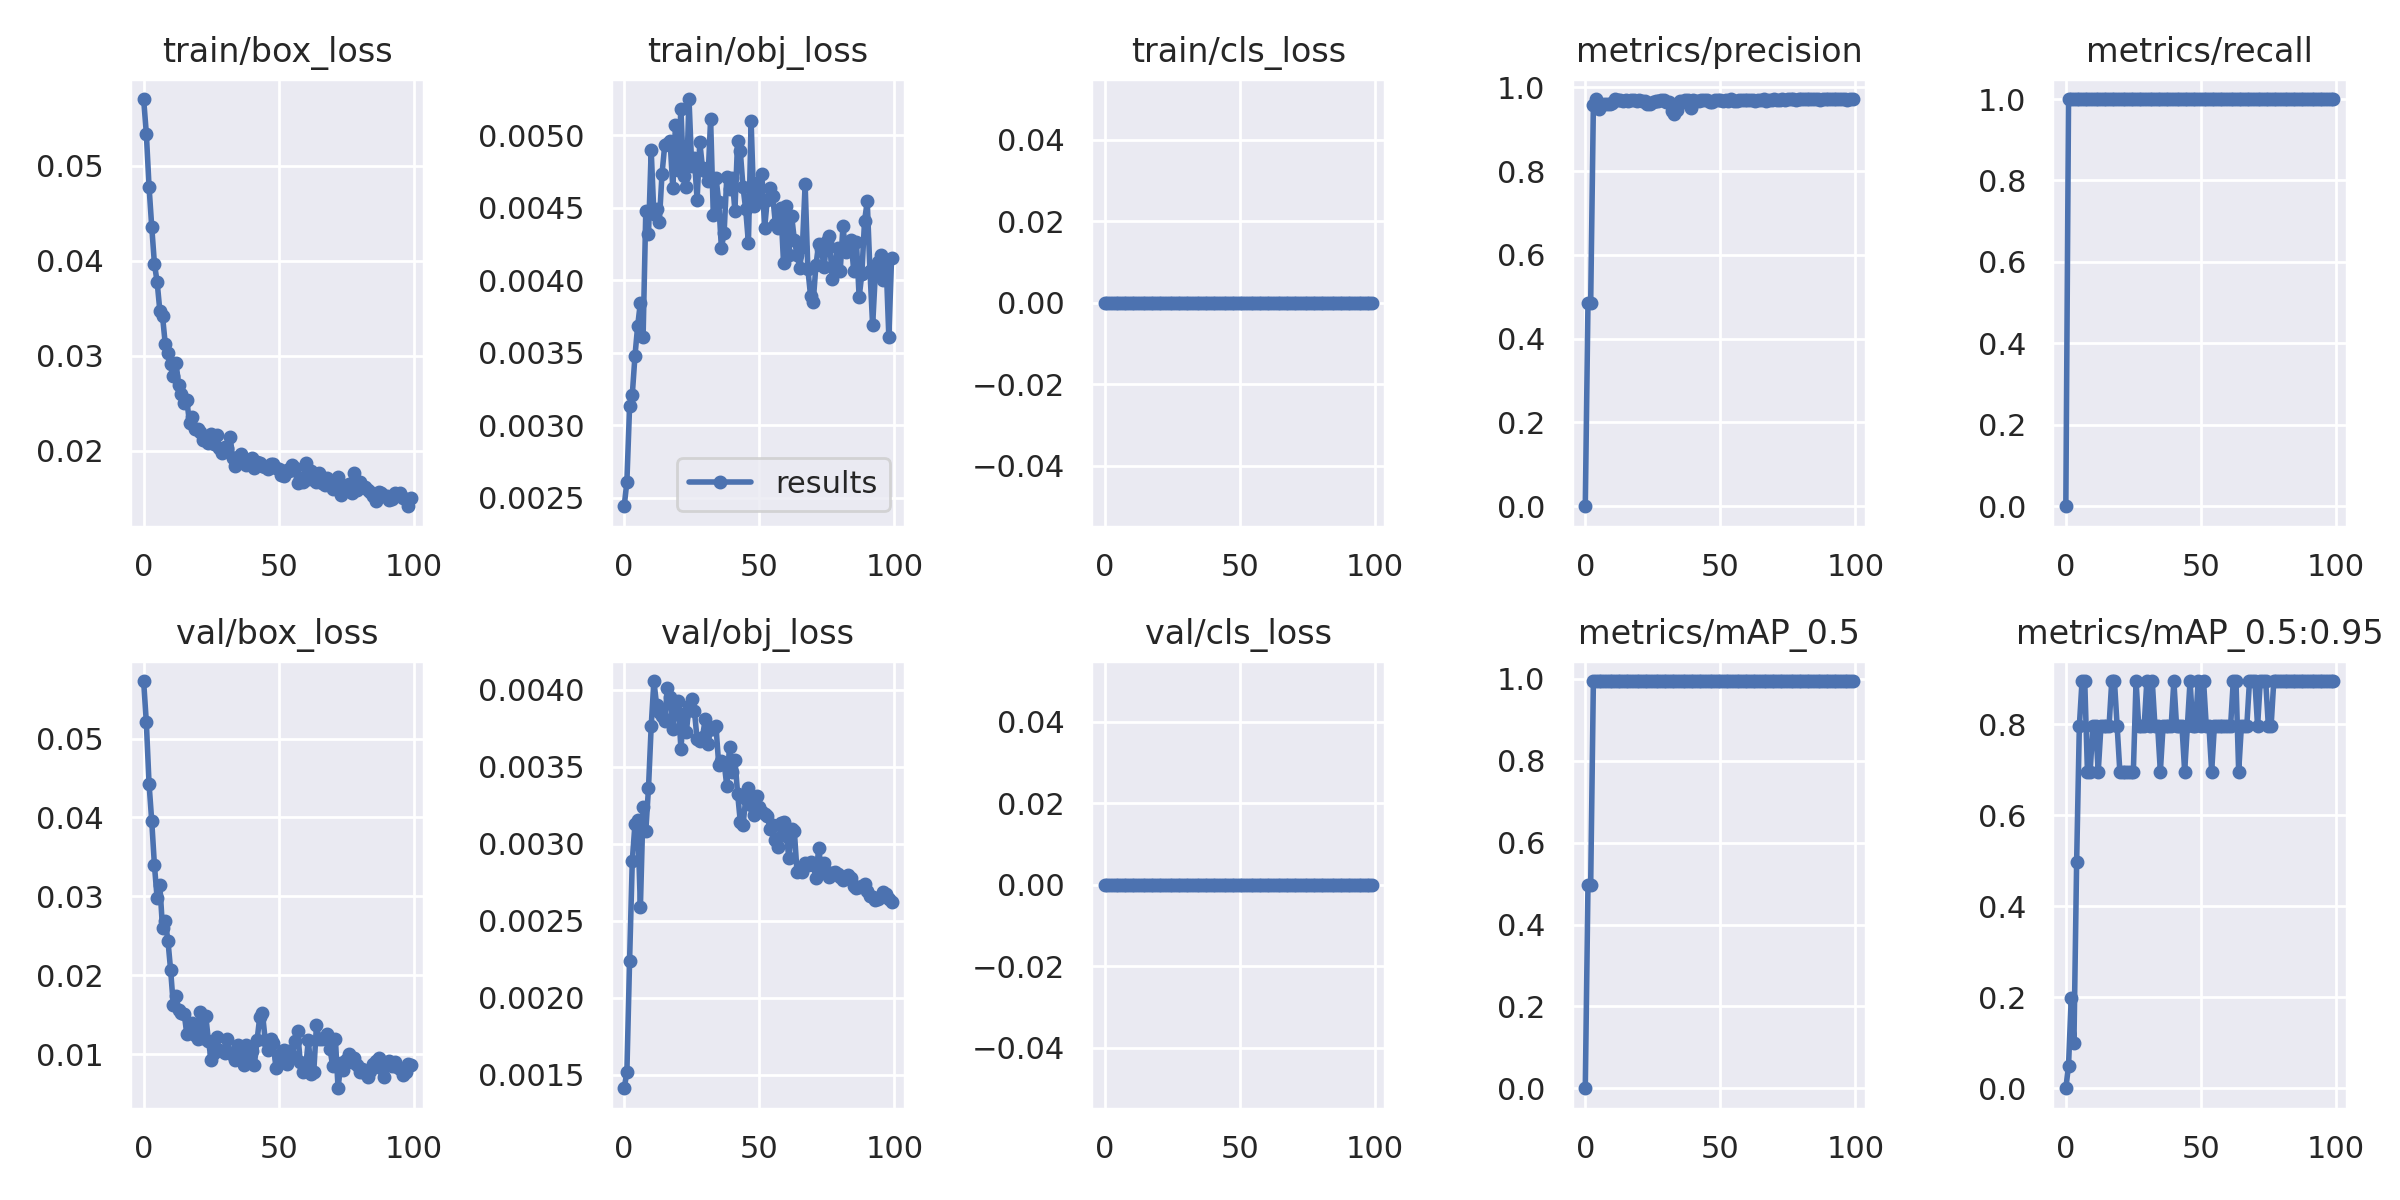

In [10]:
display.Image(f"/content/yolov5/runs_burgers/fine-tuning/results.png")

In [16]:
!python detect.py --weights '/content/yolov5/runs_burgers/fine-tuning/weights/best.pt'  --conf 0.6 --source '/content/drive/MyDrive/burgers_data/images/test' --project 'runs_burgers' --name 'detect_test' --augment --line=3
#!python detect.py --weights '/content/yolov5/yolov5/yolov5/runs_burger/feature_extraction3/weights/best.pt'  --conf 0.6 --source '/content/drive/MyDrive/burgers_data/images/test' --project 'runs_burgers' --name 'detect_test' --augment --line=3

detect: weights=['/content/yolov5/runs_burgers/fine-tuning/weights/best.pt'], source=/content/drive/MyDrive/burgers_data/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=runs_burgers, name=detect_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-167-g5deff14 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 206 layers, 12308200 parameters, 0 gradients, 16.1 GFLOPs
image 1/3 /content/drive/MyDrive/burgers_data/images/test/1.png: 640x320 1 Burgermenu, 280.8ms
image 2/3 /content/drive/MyDrive/burgers_data/images/test/2.png: 640x320 1 Burgermenu, 36.1ms

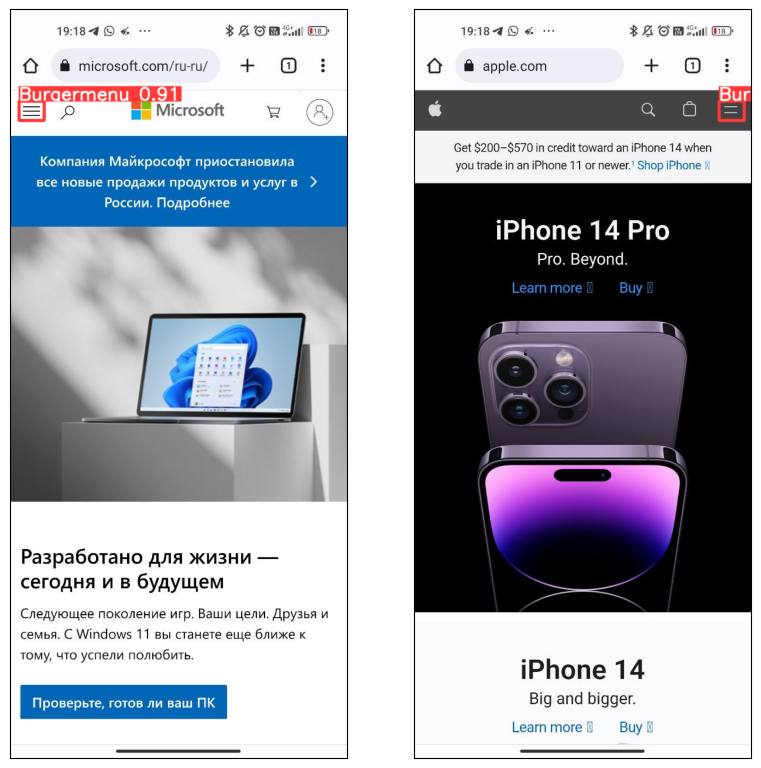

In [18]:
detect_path = r'/content/yolov5/runs_burgers/detect_test3'

images = []
for img_path in glob.glob(detect_path + '/*.png'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,25))
columns = 4
for i, image in enumerate(images):
    plt.subplot((int(len(images) / columns + 1)), columns, i + 1)
    plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
    plt.imshow(image)

In [ ]:
import flask
import io
import numpy as np
from PIL import Image, ImageDraw
import base64

app = flask.Flask(__name__)

def get_latest_folder(path=''):
    if path:
        # Получим список имен всего содержимого папки
        # и превратим их в абсолютные пути
        dir_list = [os.path.join(path, x) for x in os.listdir(path)]

        if dir_list:
            # Создадим список из путей к файлам и дат их создания.
            date_list = [[x, os.path.getctime(x)] for x in dir_list]

            # Отсортируем список по дате создания в обратном порядке
            sort_date_list = sorted(date_list, key=lambda x: x[1], reverse=True)

            # Выведем первый элемент списка. Он и будет самым последним по дате
            return sort_date_list[0][0]

# Загрузка модели для распознавания бургер-меню

# Загрузка HTML-шаблонов
@app.route("/")
def home():
    return flask.render_template("home.html")

@app.route("/predict", methods=["POST"])
def predict():
    result_image = ''
    result_text = 'Result'
    input_filename = 'input.png'
    # Загрузка изображения
    image = flask.request.files["image"].read()
    image = Image.open(io.BytesIO(image))

    if image:
        image.save(input_filename)
        !python yolov5/detect.py --weights burgers_best.pt  --conf 0.6 --source input.png --project runs_burgers --name detect_test --augment --line=3

        with open(Path(f"{get_latest_folder('runs_burgers')}/{input_filename}"), "rb") as img_file:
            b64_string = base64.b64encode(img_file.read())
        
        result_image = b64_string.decode()
        print(result_image)
        result_text = "Result"
        
        # Вывод результата
    return flask.render_template("result.html", result_text=result_text, result_image=result_image)

if __name__ == "__main__":
    app.run()